In [97]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [393]:
DIR = '../Uncertainty_Results/'
SHIFT = 'different_author'
TASK = 'CodeSummary_Module'
model = 'code2vec'
method_transform = {
    'Vanilla': ['Vanilla-WS'],
    'Entropy': ['Entropy-WS'],
    'ModelWithTemperature': ['TS-WS'],
    'ModelActivateDropout': ['MCD-SWS', 'MCD-PV', 'MCD-BALD'],
    'Mutation': ['MT-GF', 'MT-WS'],
    'PVScore': ['PV-Linear', 'PV-Log', 'PV-Exp'],
}
task_transform = {
    'CodeSummary_Module': 'Method name prediction',
    'CodeCompletion_Module': 'Code completion',
}
CSMODELS = ['code2vec', 'coderoberta', 'graphcodebert']
CCMODELS = ['lstm', 'codebert', 'codegpt']
# Rename the shift intensity names
shift_intensity_names = {
    'Validation': 'In-dist.',
    'Shift1': 'Shift 1',
    'Shift2': 'Shift 2',
    'Shift3': 'Shift 3'
}
method_order = ['Vanilla-WS', 'TS-WS', 'MCD-SWS', 'MCD-PV', 'MCD-BLAD', 'MT-GF', 'MT-WS', 'PV-Linear', 'PV-Log', 'PV-Exp']

In [3]:
def get_dataframe(shift: str, task: str, dir: str = '../Uncertainty_Eval/'):
    record = []
    if task == 'CodeSummary_Module':
        models = CSMODELS
    else:
        models = CCMODELS
    for model in models:
        res = torch.load(os.path.join(dir, shift, model, task, 'uncertainty_eval.res'))
        for ue, outputs in res.items():
            auc_res = outputs['AUC']
            aupr_res = outputs['AUPR']
            brier_res = outputs['Brier']
            if ue in ['Mutation', 'PVScore']:
                auc_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUC',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': auc_res[0]['val']*100,
                    'Shift1': auc_res[0]['test1']*100,
                    'Shift2': auc_res[0]['test2']*100,
                    'Shift3': auc_res[0]['test3']*100,
                }
                aupr_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUPR',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': aupr_res[0]['val']*100,
                    'Shift1': aupr_res[0]['test1']*100,
                    'Shift2': aupr_res[0]['test2']*100,
                    'Shift3': aupr_res[0]['test3']*100,
                }
                brier_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'Brier',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': brier_res[0]['val']*100,
                    'Shift1': brier_res[0]['test1']*100,
                    'Shift2': brier_res[0]['test2']*100,
                    'Shift3': brier_res[0]['test3']*100,
                }
            else:
                auc_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUC',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': auc_res['val']*100,
                    'Shift1': auc_res['test1']*100,
                    'Shift2': auc_res['test2']*100,
                    'Shift3': auc_res['test3']*100,
                }
                aupr_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUPR',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': aupr_res['val']*100,
                    'Shift1': aupr_res['test1']*100,
                    'Shift2': aupr_res['test2']*100,
                    'Shift3': aupr_res['test3']*100,
                }
                brier_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'Brier',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': brier_res['val']*100,
                    'Shift1': brier_res['test1']*100,
                    'Shift2': brier_res['test2']*100,
                    'Shift3': brier_res['test3']*100,
                }
            record.append(auc_ins)
            record.append(aupr_ins)
            record.append(brier_ins)
        
    df = pd.DataFrame(record)
    return df

### CS misclassification prediction

In [4]:
dir = '../Uncertainty_Eval/'
task = 'CodeSummary_Module'
shift = 'different_time'

time_cs_df = get_dataframe(shift, task, dir=dir)
time_cs_auc = time_cs_df[time_cs_df['Metric'] == 'AUC']
time_cs_aupr = time_cs_df[time_cs_df['Metric'] == 'AUPR']
time_cs_brier = time_cs_df[time_cs_df['Metric'] == 'Brier']

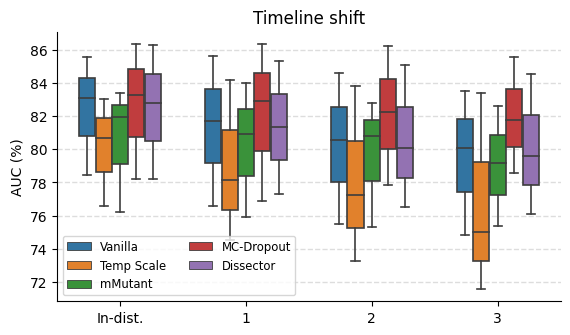

In [161]:
time_cs_auc = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [76.5909, 79.4082, 76.2293, 78.4762, 83.2745, 78.2274,    
                   83.0456, 84.8456, 83.4005, 85.5435, 86.3323, 86.2777,   
                   80.7000, 77.0327, 81.9378, 83.0686, 78.1921, 82.8093],
    'Shift1':     [74.5611, 74.1318, 75.9097, 76.5896, 82.8990, 77.3168,    
                   84.1747, 80.3423, 83.9688, 85.5941, 86.3301, 85.3000,   
                   78.1556, 72.6137, 80.9110, 81.7000, 76.8935, 81.3678],
    'Shift2':     [73.2602, 72.8542, 75.3423, 75.4817, 82.2513, 76.5058,    
                   83.7821, 80.4276, 82.7655, 84.5976, 86.2355, 85.0884,   
                   77.2295, 72.4456, 80.7969, 80.5427, 77.8357, 80.0476],
    'Shift3':     [71.5871, 72.0741, 75.3601, 74.8127, 81.7309, 76.0786,    
                   83.3923, 81.0733, 82.5825, 83.5333, 85.5618, 84.5439,   
                   75.0127, 71.4967, 79.1697, 80.0550, 78.5781, 79.6105],
})
# Reshape the data using melt function
time_cs_auc_melt = pd.melt(
    time_cs_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
time_cs_auc_melt['Shift_Intensity'] = time_cs_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cs_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('Timeline shift')
plt.xlabel('')
plt.ylabel('AUC (%)')
plt.savefig('../Figure/time_cs_auc.pdf', bbox_inches='tight')
plt.show()

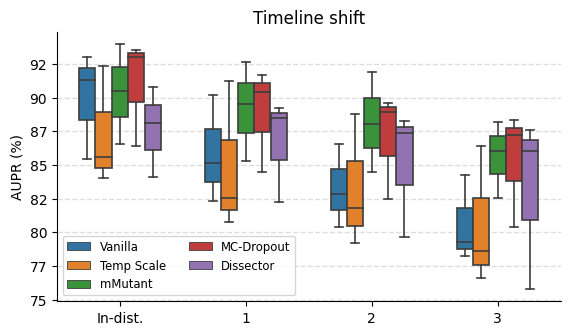

In [177]:
time_cs_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [85.598968, 90.622603, 90.519868, 91.285282, 93.018442, 88.098359,                    
                   92.309644, 92.593864, 86.533526, 93.038267, 93.549378, 90.782164,                    
                   83.998360, 89.071377, 93.966678, 85.408835, 86.381837, 84.087276],
    'Shift1':     [82.511185, 78.944547, 89.485056, 85.128890, 90.393984, 88.469976,                    
                   91.228002, 86.397095, 85.268847, 90.153353, 91.691921, 89.227406,                    
                   80.751990, 78.758982, 92.651648, 82.328953, 84.464729, 82.220145],
    'Shift2':     [81.829155, 81.811287, 88.035763, 82.864019, 88.952432, 87.389578,                    
                   88.769191, 85.915347, 84.504671, 86.534932, 89.619158, 88.264226,                    
                   79.177727, 80.988775, 91.886709, 80.431886, 82.446937, 79.687372],
    'Shift3':     [78.647793, 77.987180, 86.016131, 79.277244, 87.217130, 86.051646,                    
                   86.386732, 83.579187, 82.576289, 84.276045, 88.315927, 87.615272,                    
                   76.583969, 77.668139, 88.211390, 78.246726, 80.375143, 75.797211],
})
# Reshape the data using melt function
time_cs_aupr_melt = pd.melt(
    time_cs_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
time_cs_aupr_melt['Shift_Intensity'] = time_cs_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cs_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('Timeline shift')
plt.xlabel('')
plt.ylabel('AUPR (%)')
plt.savefig('../Figure/time_cs_aupr.pdf', bbox_inches='tight')
plt.show()

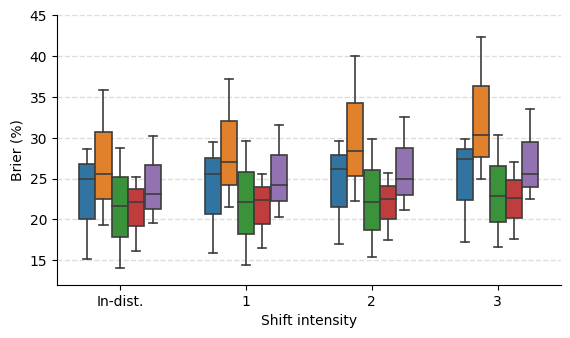

In [181]:
time_cs_brier = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [25.592980, 33.437047, 28.796280, 24.962160, 25.184891, 23.077794,                   
                   19.336671, 30.402568, 14.081326, 15.149775, 16.155470, 19.586598,                   
                   35.849417, 34.008651, 21.631758, 28.571419, 22.169024, 30.176831],
    'Shift1': [26.996684, 21.900038, 29.639067, 25.528006, 25.505021, 24.173111,               
               21.488182, 21.742471, 14.403545, 15.842332, 16.466169, 20.269968,               
               37.162760, 23.243021, 22.071603, 29.457456, 22.361552, 31.600314],
    'Shift2': [28.425975, 31.282420, 29.864350, 26.172010, 25.729080, 24.908954,               
               22.263723, 29.445429, 15.360165, 16.959957, 17.530334, 21.174836,               
               39.982132, 32.520825, 22.139714, 29.562435, 22.530334, 32.516688],
    'Shift3': [30.308647, 34.269486, 30.324157, 27.410457, 27.031744, 25.524608,               
               24.930728, 31.640902, 16.589705, 17.229539, 17.629369, 22.500013,               
               42.283018, 35.527124, 22.856429, 29.850988, 22.629369, 33.548710],
})
# Reshape the data using melt function
time_cs_brier_melt = pd.melt(
    time_cs_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
time_cs_brier_melt['Shift_Intensity'] = time_cs_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cs_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
plt.ylim(12, 45)
plt.savefig('../Figure/time_cs_brier.pdf', bbox_inches='tight')
plt.show()

In [111]:
dir = '../Uncertainty_Eval/'
task = 'CodeSummary_Module'
shift = 'different_project'
project_cs_df = get_dataframe(shift, task)
project_cs_auc = project_cs_df[project_cs_df['Metric'] == 'AUC']
project_cs_aupr = project_cs_df[project_cs_df['Metric'] == 'AUPR']
project_cs_brier = project_cs_df[project_cs_df['Metric'] == 'Brier']

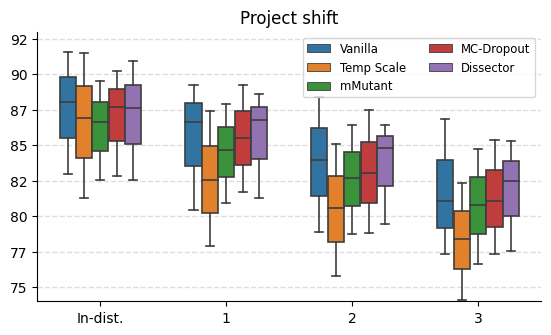

In [9]:
project_cs_auc = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [81.2892, 85.3722, 82.5648, 82.9977, 82.8536, 82.5188,    
                   86.8978, 88.5987, 89.5117, 88.0474, 90.2631, 90.9689,   
                   91.4884, 88.9076, 86.6064, 91.5600, 87.7090, 87.5938],
    'Shift1':     [77.8627, 82.7522, 80.9355, 80.4149, 81.6695, 81.3008,    
                   82.5598, 77.7263, 87.8978, 86.6201, 89.2601, 88.6126,   
                   87.3997, 83.8937, 84.6484, 89.2702, 85.5348, 86.7621],
    'Shift2':     [75.7582, 80.3515, 78.7409, 78.9116, 78.8401, 79.4517,    
                   80.5980, 78.8665, 86.4451, 83.9887, 87.4989, 86.4601,   
                   85.0793, 84.0066, 82.6597, 88.4281, 83.0254, 84.8238],
    'Shift3':     [74.1181, 78.9998, 76.6045, 77.3065, 77.3322, 77.5220,    
                   78.3853, 77.9501, 84.7071, 81.0400, 85.4043, 85.2681,   
                   82.3378, 78.4503, 80.8207, 86.8490, 81.0739, 82.5028],
})
# Reshape the data using melt function
project_cs_auc_melt = pd.melt(
    project_cs_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
project_cs_auc_melt['Shift_Intensity'] = project_cs_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cs_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('Project shift')
plt.xlabel('')
plt.ylabel('')
plt.ylim(74, 93)
plt.savefig('../Figure/project_cs_auc.pdf', bbox_inches='tight')
plt.show()

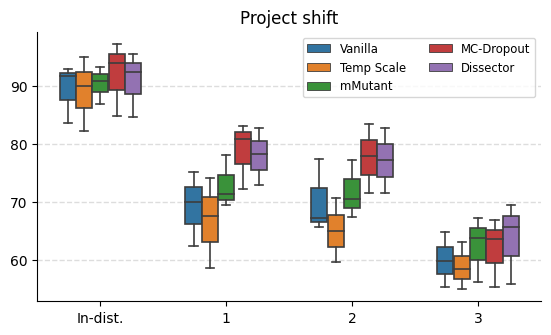

In [189]:
project_cs_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Shift3':     [54.971939, 55.986975, 56.154659, 55.301346, 55.391955, 55.892003,                    
                   63.160931, 61.110175, 67.297923, 64.748181, 66.815768, 69.484175,                    
                   58.354801, 58.495132, 63.841452, 59.782551, 63.531372, 65.606199],
    'Shift2':     [64.939192, 66.079732, 70.602663, 65.741117, 71.546048, 77.318185,                    
                   59.653815, 67.550374, 67.413254, 67.242360, 77.932507, 71.479313,                    
                   70.692569, 77.684969, 77.202312, 77.477470, 83.502462, 82.805377],
    'Shift1':     [74.177871, 70.469456, 69.427529, 70.060519, 72.309690, 72.905379,                    
                   58.539994, 62.567288, 71.351140, 62.466212, 80.861527, 78.211356,                    
                   67.565632, 75.369856, 78.079285, 75.098356, 83.209917, 82.765995],
    'Validation': [82.212556, 89.800381, 86.897229, 83.590661, 84.783651, 84.707473,                    
                   90.098257, 92.012967, 90.964021, 91.708735, 93.987335, 92.448398,                    
                   94.967746, 93.066421, 93.283348, 92.930538, 97.285248, 95.581231],
})
# Reshape the data using melt function
project_cs_aupr_melt = pd.melt(
    project_cs_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
project_cs_aupr_melt['Shift_Intensity'] = project_cs_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cs_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('Project shift')
plt.xlabel('')
plt.ylabel('')
# plt.ylim(74, 93)
plt.savefig('../Figure/project_cs_aupr.pdf', bbox_inches='tight')
plt.show()

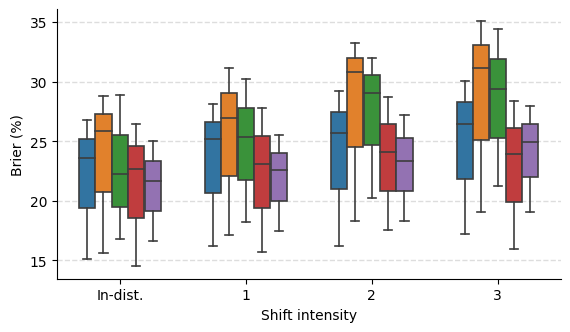

In [117]:
project_cs_brier = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [15.609858, 30.171011, 28.867206, 15.100168, 26.491741, 24.999979, 
                   25.847476, 35.571327, 22.220959, 26.826920, 22.708673, 21.645617, 
                   28.780569, 32.351012, 16.776998, 23.632624, 14.492980, 16.636228],
    'Shift1': [17.167037, 57.117398, 30.226500, 16.176184, 27.773834, 25.552813, 
               26.959579, 61.826044, 25.327685, 28.160773, 23.055151, 22.557965, 
               31.125649, 60.270999, 18.251431, 25.155992, 15.731515, 17.501745],
    'Shift2': [18.308057, 50.156929, 31.962277, 16.228085, 28.744807, 27.243757, 
               30.801999, 57.331127, 29.086278, 29.205767, 24.131077, 23.365518, 
               33.248572, 51.291460, 20.242621, 25.706850, 17.525247, 18.329606],
    'Shift3': [19.053001, 50.976271, 34.396194, 17.248800, 28.374321, 27.934690, 
               31.139891, 58.111439, 29.367401, 30.057668, 23.892808, 24.906326, 
               35.056375, 53.004058, 21.208443, 26.489355, 15.990974, 19.095867],
})
# Reshape the data using melt function
project_cs_brier_melt = pd.melt(
    project_cs_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
project_cs_brier_melt['Shift_Intensity'] = project_cs_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cs_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
# plt.ylim(12, 45)
plt.savefig('../Figure/project_cs_brier.pdf', bbox_inches='tight')
plt.show()

In [24]:
dir = '../Uncertainty_Eval/'
task = 'CodeSummary_Module'
shift = 'different_author'

author_cs_df = get_dataframe(shift, task)
author_cs_auc = author_cs_df[author_cs_df['Metric'] == 'AUC']
author_cs_aupr = author_cs_df[author_cs_df['Metric'] == 'AUPR']
author_cs_brier = author_cs_df[author_cs_df['Metric'] == 'Brier']

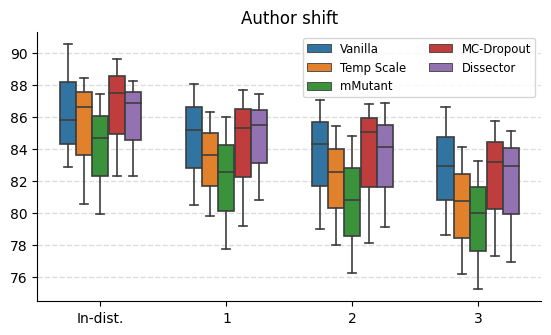

In [194]:
author_cs_auc = pd.DataFrame({
    # 'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Method': ['mMutant', 'Entropy', 'Temp Scale', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_author'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [84.6731, 86.1166, 86.6442, 82.8763, 87.4954, 86.8384,    
                   87.4313, 87.7106, 88.4278, 90.5411, 89.6022, 88.2213,   
                   79.9495, 85.8462, 80.6001, 85.8042, 82.3221, 82.3173],
    'Shift1':     [82.5498, 85.4952, 83.6260, 80.4938, 85.3121, 85.4678,    
                   85.9949, 87.1119, 86.3121, 88.0739, 87.6909, 87.4442,   
                   77.7735, 84.0066, 79.8000, 85.1643, 79.2199, 80.8078],
    'Shift2':     [80.8409, 83.4705, 82.5874, 79.0099, 85.0864, 84.1459,    
                   84.8369, 83.6186, 85.4382, 87.0527, 86.7853, 86.8816,   
                   76.2879, 82.6892, 78.0328, 84.3304, 78.1404, 79.1340],
    'Shift3':     [79.9859, 81.1186, 80.7585, 78.6638, 83.2161, 82.9193,    
                   83.2632, 80.0471, 84.1198, 86.6159, 85.7160, 85.1445,   
                   75.2730, 78.0613, 76.2049, 82.9288, 77.3184, 76.9342],
})
# Reshape the data using melt function
author_cs_auc_melt = pd.melt(
    author_cs_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
author_cs_auc_melt['Shift_Intensity'] = author_cs_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cs_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.title('Author shift')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/author_cs_auc.pdf', bbox_inches='tight')
plt.show()

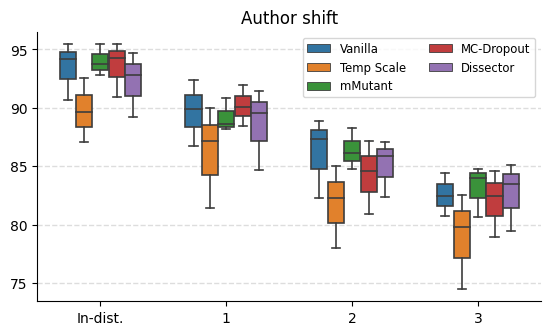

In [197]:
author_cs_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_author'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [89.642561, 94.179347, 93.734609, 94.194956, 94.310687, 92.818592,
                   92.579097, 95.462646, 95.466559, 95.452496, 95.431552, 94.694087,
                   87.103748, 93.649548, 92.832585, 90.682064, 90.949927, 89.212315],
    'Shift1':     [87.150144, 87.843113, 88.146577, 86.727688, 90.045011, 89.549654,
                   89.975099, 91.457220, 90.840217, 92.348467, 91.961786, 91.447449,
                   81.424883, 89.983508, 88.653735, 89.936008, 88.482534, 84.713124],
    'Shift2':     [78.027132, 84.492631, 88.238681, 82.253786, 87.120046, 85.872027,
                   85.032791, 89.316793, 86.114355, 88.855369, 84.585044, 87.073120,
                   82.272387, 84.455190, 84.782036, 87.305827, 80.919922, 82.325621],
    'Shift3':     [74.484208, 80.969862, 80.629750, 80.741432, 84.609923, 83.502839,
                   82.498208, 84.756430, 83.980126, 84.421185, 82.449773, 85.122692,
                   79.787829, 80.518040, 84.800014, 82.480962, 78.968633, 79.411024],
})
# Reshape the data using melt function
author_cs_aupr_melt = pd.melt(
    author_cs_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
author_cs_aupr_melt['Shift_Intensity'] = author_cs_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cs_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.title('Author shift')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/author_cs_aupr.pdf', bbox_inches='tight')
plt.show()

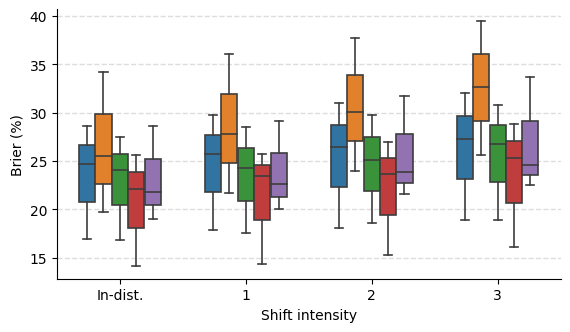

In [206]:
author_cs_brier = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_author'] * 6 * 3,
    'Task': ['Method name prediction'] * 6 * 3,
    'Model': ['code2vec'] * 6 + ['coderoberta'] * 6 + ['graphcodebert'] * 6,
    'Validation': [25.522104, 31.722360, 24.039079, 24.654126, 25.674438, 28.582640, 
                   19.781218, 30.951230, 16.869102, 16.908153, 14.097996, 19.053960, 
                   34.221074, 32.545086, 27.449085, 28.641540, 22.075249, 21.845268],
    'Shift1': [27.783635, 20.718479, 24.236249, 25.702578, 25.770254, 29.180176, 
               21.738814, 20.590217, 17.573614, 17.858014, 14.348630, 20.049371, 
               36.035733, 23.064063, 28.489807, 29.724452, 23.414274, 22.597966],
    'Shift2': [30.078551, 46.104563, 25.145309, 26.498262, 26.952465, 31.746676, 
               23.988194, 45.632564, 18.624869, 18.070123, 15.270705, 21.556107, 
               37.764654, 48.007807, 29.808471, 31.011486, 23.623857, 23.869533],
    'Shift3': [32.661255, 44.514903, 26.758865, 27.316340, 28.881198, 33.689362, 
               25.673847, 43.993512, 18.935581, 18.942913, 16.061410, 22.518849, 
               39.445726, 45.648551, 30.785715, 32.065663, 25.346969, 24.591428],
})
# Reshape the data using melt function
author_cs_brier_melt = pd.melt(
    author_cs_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
author_cs_brier_melt['Shift_Intensity'] = author_cs_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cs_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
# plt.ylim(12, 45)
plt.savefig('../Figure/author_cs_brier.pdf', bbox_inches='tight')
plt.show()

#### Put all three shifts together

In [143]:
def plot_misclassificaion(
    ax: plt.Axes,
    data_melt: pd.DataFrame,
    x: str = 'Shift_Intensity',
    xlabel: bool = True,
    y: str = 'AUC',
    ylabel: bool = True,
    ylim: tuple = None,
    hue: str = 'Method',
    title: str = None,
    legend: bool = True,
):
    ax.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
    sns.boxplot(
        data=data_melt, 
        x=x, 
        y=y, 
        hue=hue, 
        hue_order=['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector'], 
        width=0.65,
        linewidth=1.2,
        ax=ax,
    )
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if legend:
        ax.legend(ncols=2, fontsize='small')
    else:
        ax.legend().remove()
    # set the y-axis tick labels as integers
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    if title:
        ax.set_title(title, fontdict={'fontsize': 12})
    else:
        ax.set_title('')
    if xlabel:
        ax.set_xlabel('Shift intensity', fontdict={'fontsize': 12})
    else:
        ax.set_xlabel('')
    if ylabel:
        ax.set_ylabel(f'{y} (%)', fontdict={'fontsize': 12})
    else:
        ax.set_ylabel('')
    if ylim:
        ax.set_ylim(ylim)

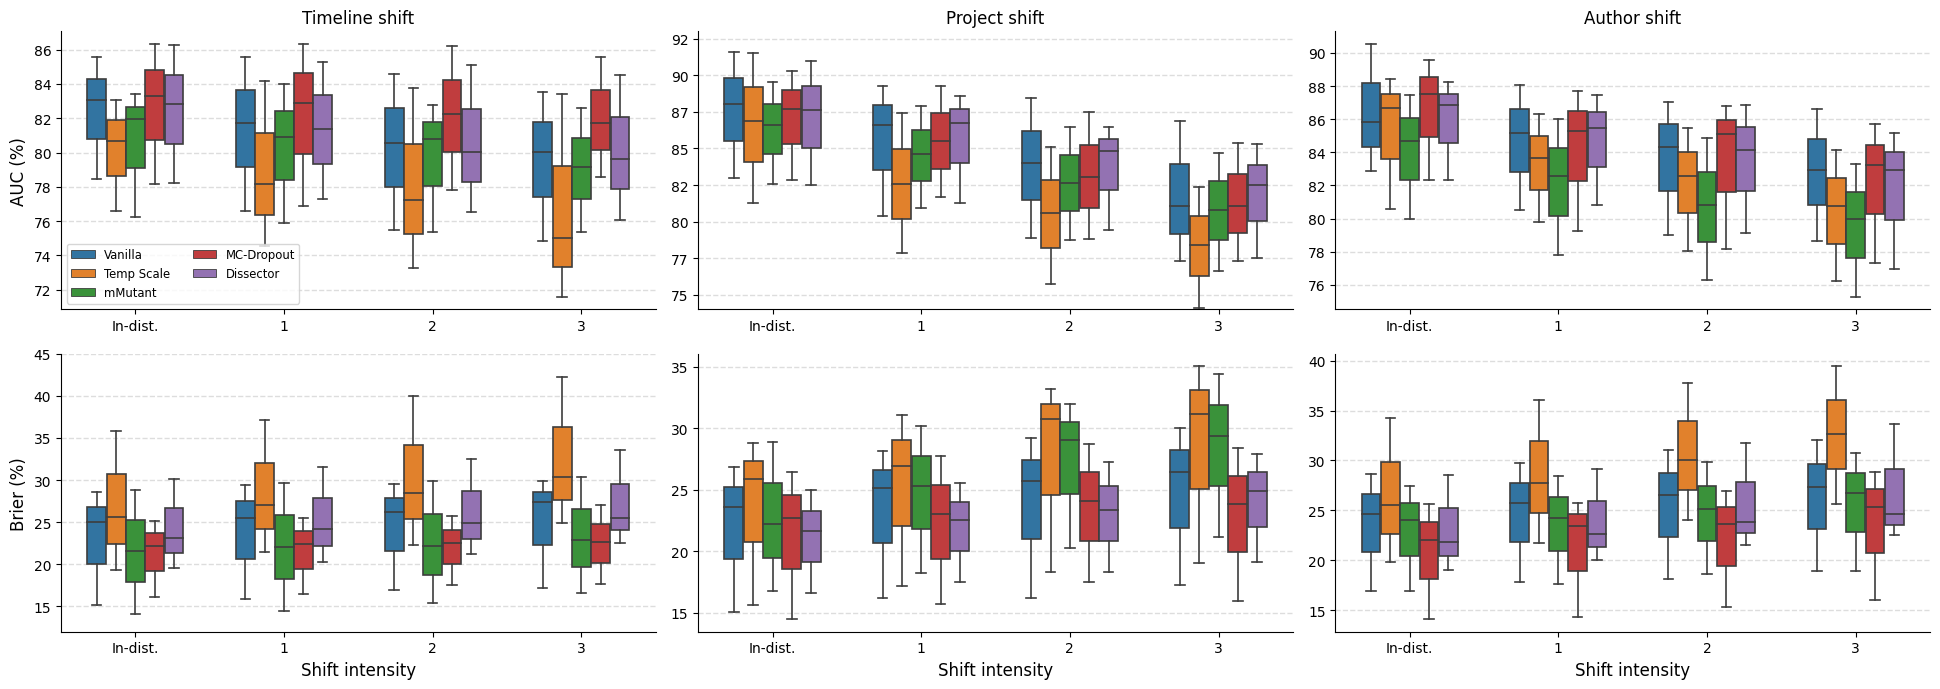

In [207]:
# Create a figure and axis
fig = plt.figure(figsize=(19.5, 7))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# Plot the data
plot_misclassificaion(
    ax1, 
    data_melt=time_cs_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=True,
    title='Timeline shift',
    legend=True,
)

plot_misclassificaion(
    ax2, 
    data_melt=project_cs_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=False,
    ylim=(74, 93),
    title='Project shift',
    legend=False,
)

plot_misclassificaion(
    ax3, 
    data_melt=author_cs_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=False,
    title='Author shift',
    legend=False,
)

plot_misclassificaion(
    ax4, 
    data_melt=time_cs_brier_melt, 
    xlabel=True,
    y='Brier',
    ylim=(12, 45),
    ylabel=True,
    legend=False,
)

plot_misclassificaion(
    ax5, 
    data_melt=project_cs_brier_melt, 
    xlabel=True,
    y='Brier',
    ylabel=False,
    legend=False,
)

plot_misclassificaion(
    ax6, 
    data_melt=author_cs_brier_melt, 
    xlabel=True,
    y='Brier',
    ylabel=False,
    legend=False,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
plt.tight_layout()
plt.savefig('../Figure/cs_miscls_detect.pdf', bbox_inches='tight')
plt.show()

### Timeshift CC

In [59]:
dir = '../Uncertainty_Eval/'
task = 'CodeCompletion_Module'
shift = 'different_time'

time_cc_df = get_dataframe(shift, task)
time_cc_auc = time_cc_df[time_cc_df['Metric'] == 'AUC']
time_cc_aupr = time_cc_df[time_cc_df['Metric'] == 'AUPR']
time_cc_brier = time_cc_df[time_cc_df['Metric'] == 'Brier']

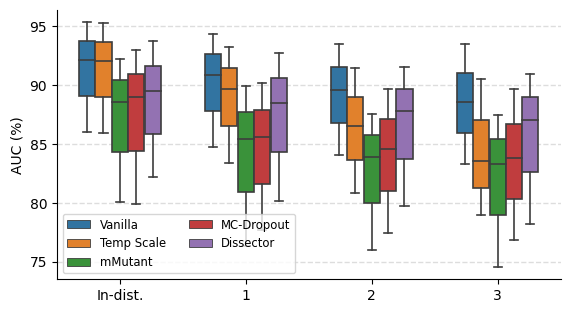

In [230]:
time_cc_auc = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [92.057371, 94.213335, 88.567362, 92.097439, 79.901314, 89.462009,
                   85.913402, 93.187556, 92.221278, 85.992579, 88.962363, 82.179083,
                   95.264209, 94.599574, 80.077671, 95.355066, 92.980531, 93.766900],
        'Shift1': [89.689983, 94.393282, 85.458234, 90.894074, 77.665605, 88.462009,
                   83.408543, 93.403884, 89.906157, 84.744651, 85.591776, 80.179083,
                   93.251897, 95.118375, 76.336812, 94.331148, 90.212175, 92.766900],
        'Shift2': [86.558287, 92.660309, 83.935840, 89.604016, 77.476437, 87.825101,
                   80.799668, 91.463029, 87.513415, 84.030205, 84.596434, 79.694576,
                   91.425574, 94.028088, 75.957164, 93.448242, 89.642540, 91.520835],
        'Shift3': [83.546747, 92.650167, 83.311443, 88.571927, 76.829043, 87.013218,
                   78.984302, 90.921669, 87.492693, 83.310430, 83.773818, 78.214343,
                   90.497432, 94.020385, 74.550897, 93.516644, 89.674887, 90.931785],
})
# Reshape the data using melt function
time_cc_auc_melt = pd.melt(
    time_cc_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
time_cc_auc_melt['Shift_Intensity'] = time_cc_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cc_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.title('')
plt.xlabel('')
plt.ylabel('AUC (%)')
plt.savefig('../Figure/time_cc_auc.pdf', bbox_inches='tight')
plt.show()

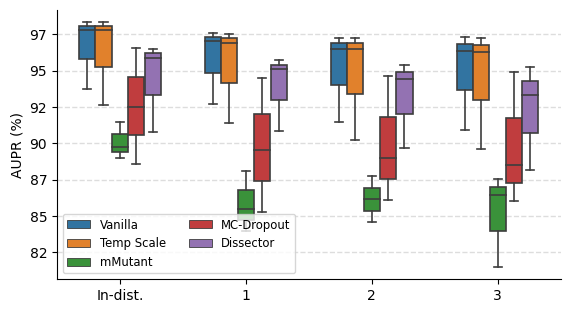

In [185]:
time_cc_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [97.803771, 97.484272, 88.993143, 97.825545, 88.615055, 95.902691,
                   92.670523, 96.424917, 89.780509, 93.739700, 92.529135, 90.790089,
                   98.347173, 98.155575, 91.464578, 98.346375, 96.565295, 96.488540],
    'Shift1': [96.924958, 96.765064, 85.468779, 97.025775, 85.260888, 95.092582,
               91.432963, 95.590724, 83.998613, 92.702587, 89.571684, 90.880120,
               97.544588, 97.530692, 88.098884, 97.587315, 94.501200, 95.756849],
    'Shift2': [96.483018, 96.108863, 86.155196, 96.520489, 86.135740, 94.451394,
               90.261798, 94.302720, 84.576289, 91.498975, 88.975742, 89.656365,
               97.261136, 97.148427, 87.743308, 97.279889, 94.666027, 95.407237],
    'Shift3': [96.319603, 95.969428, 86.453966, 96.359684, 86.068664, 93.338833,
               89.614452, 93.882691, 81.498599, 90.946383, 88.529819, 88.146048,
               97.273546, 97.153911, 87.553496, 97.295996, 94.905675, 95.264043],
})

# Reshape the data using melt function
time_cc_aupr_melt = pd.melt(
    time_cc_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
time_cc_aupr_melt['Shift_Intensity'] = time_cc_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cc_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('')
plt.ylabel('AUPR (%)')
plt.savefig('../Figure/time_cc_aupr.pdf', bbox_inches='tight')
plt.show()

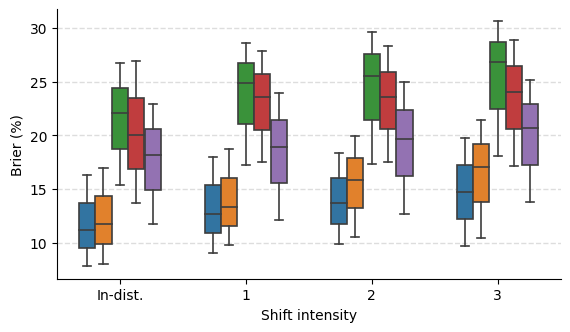

In [236]:
time_cc_brier = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_time'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [11.727352, 9.920426, 26.780562, 11.132842, 26.938218, 18.185711, 
                   16.944572, 11.906990, 15.368140, 16.291665, 20.052017, 22.929714, 
                   8.038250, 10.911210, 22.104211, 7.764915, 13.723225, 11.687397],
    'Shift1': [13.268850, 11.434595, 28.576342, 12.688308, 27.898433, 18.896444, 
               18.697830, 13.808163, 17.229878, 17.985221, 23.536769, 23.906352, 
               9.730792, 13.829777, 24.842401, 8.994938, 17.536868, 12.138048],
    'Shift2': [15.838954, 12.099546, 29.632291, 13.713052, 28.312629, 19.695098, 
               19.953931, 15.113315, 17.367574, 18.317296, 23.587750, 25.014914, 
               10.531163, 14.763193, 25.555567, 9.833424, 17.529388, 12.700201],
    'Shift3': [17.058428, 12.408865, 30.621791, 14.731306, 28.872493, 20.723360, 
               21.409088, 15.330907, 18.112933, 19.715057, 24.034234, 25.169714, 
               10.408297, 14.651845, 26.830930, 9.693894, 17.168448, 13.783462],
})
# Reshape the data using melt function
time_cc_brier_melt = pd.melt(
    time_cc_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
time_cc_brier_melt['Shift_Intensity'] = time_cc_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=time_cc_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
# plt.ylim(12, 45)
plt.savefig('../Figure/time_cc_brier.pdf', bbox_inches='tight')
plt.show()

### Projectshift CC

In [62]:
dir = '../Uncertainty_Eval/'
task = 'CodeCompletion_Module'
shift = 'different_project'

project_cc_df = get_dataframe(shift, task)
project_cc_auc = project_cc_df[project_cc_df['Metric'] == 'AUC']
project_cc_aupr = project_cc_df[project_cc_df['Metric'] == 'AUPR']
project_cc_brier = project_cc_df[project_cc_df['Metric'] == 'Brier']

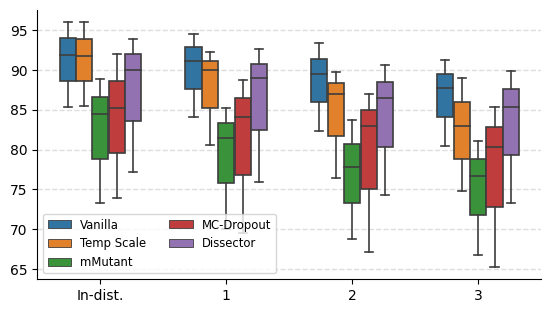

In [217]:
project_cc_auc = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_project'] * 6 + ['different_project'] * 6 + ['different_project'] * 6,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [91.788426, 94.002994, 84.426230, 91.913547, 73.911511, 90.038638,
               85.420518, 93.524027, 88.865109, 85.378159, 85.149608, 77.226601,
               95.998889, 94.113268, 73.323061, 95.988240, 91.977809, 93.883973],
    'Shift1': [89.960156, 85.837561, 81.472428, 91.071379, 69.587164, 88.997980,
               80.528126, 81.954144, 85.232852, 84.041713, 84.116117, 75.864371,
               92.218548, 86.791236, 70.038780, 94.557064, 88.710004, 92.572165],
    'Shift2': [86.994970, 86.574343, 77.775995, 89.511809, 67.167102, 86.458419,
               76.368454, 83.758257, 83.695155, 82.340493, 82.940850, 74.274911,
               89.668135, 86.888459, 68.804132, 93.321035, 86.944238, 90.599955],
    'Shift3': [82.932423, 85.048880, 76.684325, 87.688818, 65.257791, 85.290033,
               74.807386, 79.424085, 81.031253, 80.459384, 80.377717, 73.239069,
               88.952972, 86.008064, 66.774179, 91.203577, 85.280192, 89.904076],
})
# Reshape the data using melt function
project_cc_auc_melt = pd.melt(
    project_cc_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
project_cc_auc_melt['Shift_Intensity'] = project_cc_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cc_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/project_cc_auc.pdf', bbox_inches='tight')
plt.show()

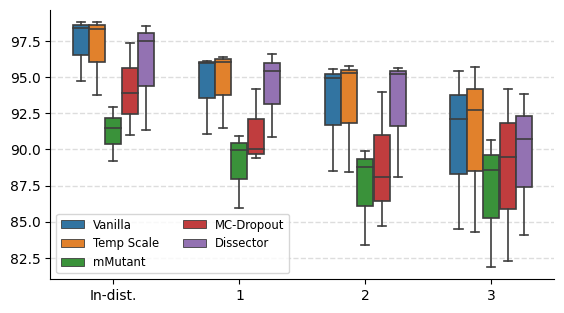

In [84]:
project_cc_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [98.335556, 98.071731, 91.472914, 98.366957, 90.995565, 97.496532,                   
                   93.763080, 97.398773, 89.198706, 94.740829, 93.908894, 91.303931,                   
                   98.797568, 98.595750, 92.926440, 98.797011, 97.319776, 98.531414],
    'Shift1': [96.392225, 95.317971, 90.928601, 96.084534, 90.011396, 95.411519,               
               91.473615, 90.277386, 85.961325, 91.070357, 89.405980, 90.839953,               
               96.030884, 95.590285, 89.978043, 95.968500, 94.142000, 96.585740],
    'Shift2': [95.251214, 94.126545, 89.858455, 94.923251, 88.065152, 95.194882,               
               88.407136, 88.152246, 83.376120, 88.503188, 84.735093, 88.092387,               
               95.729577, 94.955557, 88.760794, 95.519944, 93.953046, 95.587111],
    'Shift3': [92.713001, 94.023641, 90.646460, 92.119216, 89.462208, 90.741030,               
               84.303117, 84.145351, 81.869616, 84.508772, 82.304678, 84.049591,               
               95.664743, 94.725255, 88.607130, 95.390012, 94.169380, 93.823192]
})
# Reshape the data using melt function
project_cc_aupr_melt = pd.melt(
    project_cc_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
project_cc_aupr_melt['Shift_Intensity'] = project_cc_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cc_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/project_cc_aupr.pdf', bbox_inches='tight')
plt.show()

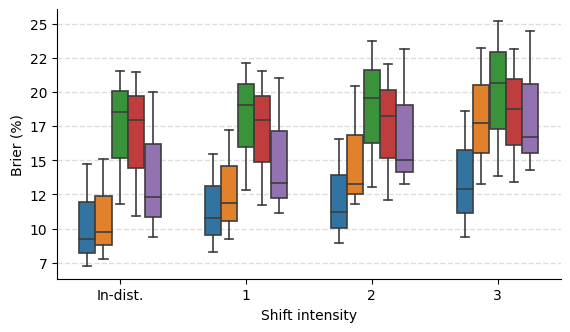

In [219]:
project_cc_brier = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [9.731204, 8.394119, 21.542682, 9.207725, 21.427310, 12.332414, 
                   15.065795, 9.528452, 18.536656, 14.704460, 17.925091, 19.999511, 
                   7.803838, 8.447385, 11.775686, 7.227138, 10.931579, 9.371045],
    'Shift1': [11.899420, 14.534593, 22.146339, 10.805477, 21.503015, 13.303570, 
               17.203979, 19.514014, 19.079684, 15.473735, 17.942474, 21.048823, 
               9.235406, 15.692533, 12.852353, 8.270817, 11.730082, 11.129312],
    'Shift2': [13.239333, 13.645294, 23.710169, 11.221504, 22.057277, 15.035354, 
               20.454885, 18.234655, 19.531059, 16.553420, 18.209816, 23.118538, 
               11.768216, 14.626060, 13.026361, 8.923775, 12.067163, 13.253376],
    'Shift3': [17.757827, 14.986397, 25.155774, 12.862016, 23.124588, 16.733977, 
               23.239990, 21.180052, 20.658747, 18.638749, 18.763878, 24.473571, 
               13.277613, 15.708712, 13.869779, 9.374510, 13.416907, 14.277036],
})
# Reshape the data using melt function
project_cc_brier_melt = pd.melt(
    project_cc_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
project_cc_brier_melt['Shift_Intensity'] = project_cc_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=project_cc_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
# plt.ylim(12, 45)
plt.savefig('../Figure/project_cc_brier.pdf', bbox_inches='tight')
plt.show()

### Authorshift CC

In [85]:
dir = '../Uncertainty_Eval/'
task = 'CodeCompletion_Module'
shift = 'different_author'

author_cc_df = get_dataframe(shift, task)
author_cc_auc = author_cc_df[author_cc_df['Metric'] == 'AUC']
author_cc_aupr = author_cc_df[author_cc_df['Metric'] == 'AUPR']
author_cc_brier = author_cc_df[author_cc_df['Metric'] == 'Brier']

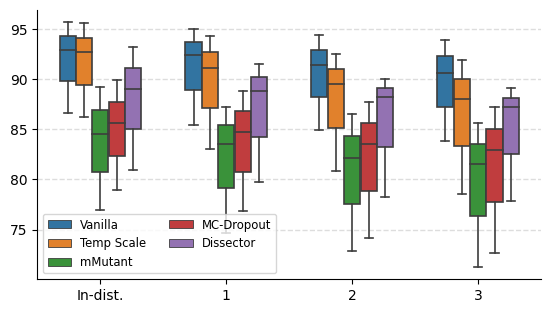

In [220]:
author_cc_auc = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUC'] * 6 * 3,
    'Shift': ['different_author'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [92.710675, 94.157624, 84.583977, 92.947848, 78.999969, 89.033367,               
                   86.240466, 93.795677, 89.205696, 86.646413, 85.638394, 80.976856,               
                   95.650930, 94.044463, 76.922891, 95.734726, 89.946917, 93.207795],
        'Shift1': [91.168989, 94.800748, 83.569791, 92.474183, 76.832330, 88.800408,               
                   83.030028, 94.577983, 87.293861, 85.397773, 84.738986, 79.751669,               
                   94.363243, 94.836510, 74.693025, 95.067125, 88.889671, 91.587477],
        'Shift2': [89.570981, 92.220400, 82.158638, 91.454590, 74.139887, 88.229118,               
                   80.820220, 90.756916, 86.561732, 84.944625, 83.526401, 78.287660,               
                   92.565676, 92.432118, 72.904223, 94.469555, 87.771874, 90.049905],
        'Shift3': [88.092231, 92.639304, 81.499390, 90.669593, 72.640334, 87.221671, 
                   78.522087, 91.848935, 85.639824, 83.880761, 82.919698, 77.848704,
                   91.967359, 93.109261, 71.253575, 93.965705, 87.254396, 89.104877],
})
# Reshape the data using melt function
author_cc_auc_melt = pd.melt(
    author_cc_auc, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)
author_cc_auc_melt['Shift_Intensity'] = author_cc_auc_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cc_auc_melt, 
    x='Shift_Intensity', 
    y='AUC', 
    hue='Method',
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/author_cc_auc.pdf', bbox_inches='tight')
plt.show()

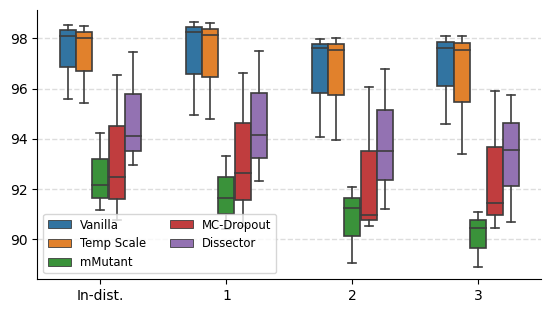

In [109]:
author_cc_aupr = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['AUPR'] * 6 * 3,
    'Shift': ['different_author'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [98.023471, 97.800209, 92.142080, 98.109024, 90.745972, 97.469995,
                   95.407401, 97.191132, 91.171869, 95.587068, 92.486353, 92.939332,
                   98.499766, 98.330791, 94.219553, 98.523009, 96.558910, 94.115830],
    'Shift1':     [98.138296, 97.981842, 90.414994, 98.255128, 90.528625, 97.510482,
                   94.790028, 97.542189, 93.298402, 94.934898, 92.629576, 92.300983,
                   98.625018, 98.469021, 91.620114, 98.653600, 96.617163, 94.139781],
    'Shift2':     [97.550699, 97.170775, 89.031852, 97.602282, 90.535912, 96.794626,
                   93.951603, 95.473246, 92.084945, 94.055651, 90.951018, 91.220467,
                   97.998288, 97.693818, 91.227081, 97.981171, 96.069185, 93.515665],
    'Shift3':     [97.521247, 97.237891, 88.887731, 97.610431, 90.439357, 95.731719,
                   93.398909, 96.081563, 90.436316, 94.584304, 91.455092, 90.679747,
                   98.102604, 97.874979, 91.085253, 98.113526, 95.909286, 93.546935],
})
# Reshape the data using melt function
author_cc_aupr_melt = pd.melt(
    author_cc_aupr, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUPR',
)
author_cc_aupr_melt['Shift_Intensity'] = author_cc_aupr_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cc_aupr_melt, 
    x='Shift_Intensity', 
    y='AUPR', 
    hue='Method',
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncols=2, fontsize='small')
plt.xlabel('')
plt.ylabel('')
plt.savefig('../Figure/author_cc_aupr.pdf', bbox_inches='tight')
plt.show()

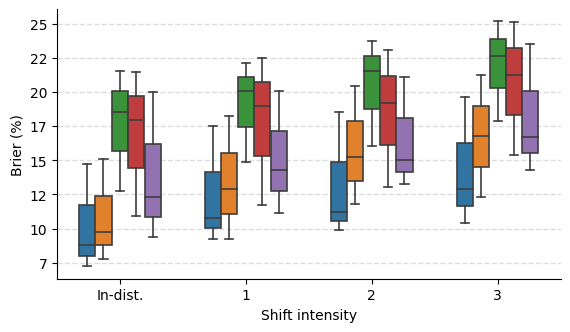

In [221]:
author_cc_brier = df = pd.DataFrame({
    'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'] * 3,
    'Metric': ['Brier'] * 6 * 3,
    'Shift': ['different_project'] * 6 * 3,
    'Task': ['Code completion'] * 6 * 3,
    'Model': ['lstm'] * 6 + ['codebert'] * 6 + ['codegpt'] * 6,
    'Validation': [9.731204, 8.394119, 21.542682, 8.807725, 21.427310, 12.332414, 
                   15.065795, 9.528452, 18.536656, 14.704460, 17.925091, 19.999511, 
                   7.803838, 8.447385, 12.775686, 7.227138, 10.931579, 9.371045],
    'Shift1': [12.899420, 14.534593, 22.146339, 10.805477, 22.503015, 14.303570, 
               18.203979, 19.514014, 20.079684, 17.473735, 18.942474, 20.048823, 
               9.235406, 15.692533, 14.852353, 9.270817, 11.730082, 11.129312],
    'Shift2': [15.239333, 13.645294, 23.710169, 11.221504, 23.057277, 15.035354, 
               20.454885, 18.234655, 21.531059, 18.553420, 19.209816, 21.118538, 
               11.768216, 14.626060, 16.026361, 9.923775, 13.067163, 13.253376],
    'Shift3': [16.757827, 14.986397, 25.155774, 12.862016, 25.124588, 16.733977, 
               21.239990, 21.180052, 22.658747, 19.638749, 21.263878, 23.473571, 
               12.277613, 15.708712, 17.869779, 10.374510, 15.416907, 14.277036],
})
# Reshape the data using melt function
author_cc_brier_melt = pd.melt(
    author_cc_brier, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='Brier',
)
author_cc_brier_melt['Shift_Intensity'] = author_cc_brier_melt['Shift_Intensity'].map(shift_intensity_names)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
plt.figure(figsize=(6.5, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
ax = sns.boxplot(
    data=author_cc_brier_melt, 
    x='Shift_Intensity', 
    y='Brier', 
    hue='Method', 
    hue_order=method_order, 
    width=0.65,
    linewidth=1.2,
)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(ncols=2, fontsize='small')
ax.legend().remove()
# set the y-axis tick labels as integers
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('')
plt.xlabel('Shift intensity')
plt.ylabel('Brier (%)')
# plt.ylim(12, 45)
plt.savefig('../Figure/author_cc_brier.pdf', bbox_inches='tight')
plt.show()

#### Put all three shifts together

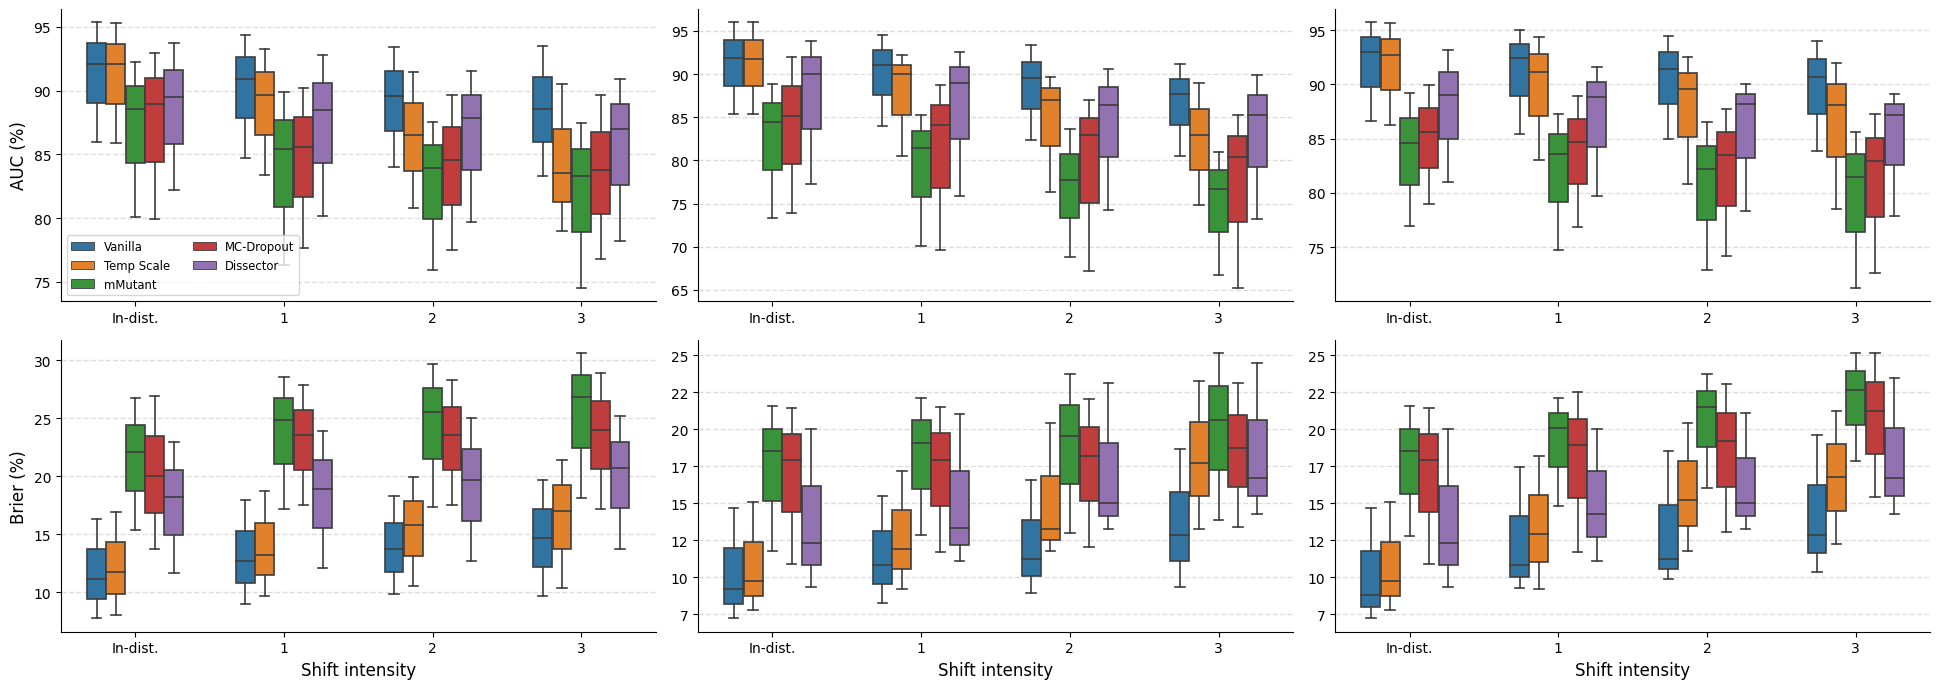

In [237]:
# Create a figure and axis
fig = plt.figure(figsize=(19.5, 7))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# Plot the data
plot_misclassificaion(
    ax1, 
    data_melt=time_cc_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=True,
    # title='Timeline shift',
    legend=True,
)

plot_misclassificaion(
    ax2, 
    data_melt=project_cc_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=False,
    # title='Project shift',
    legend=False,
)

plot_misclassificaion(
    ax3, 
    data_melt=author_cc_auc_melt, 
    xlabel=False,
    y='AUC',
    ylabel=False,
    # title='Author shift',
    legend=False,
)

plot_misclassificaion(
    ax4, 
    data_melt=time_cc_brier_melt, 
    xlabel=True,
    y='Brier',
    ylabel=True,
    legend=False,
)

plot_misclassificaion(
    ax5, 
    data_melt=project_cc_brier_melt, 
    xlabel=True,
    y='Brier',
    ylabel=False,
    legend=False,
)

plot_misclassificaion(
    ax6, 
    data_melt=author_cc_brier_melt, 
    xlabel=True,
    y='Brier',
    ylabel=False,
    legend=False,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
plt.tight_layout()
plt.savefig('../Figure/cc_miscls_detect.pdf', bbox_inches='tight')
plt.show()

#### Merge AUPR results for the two tasks together

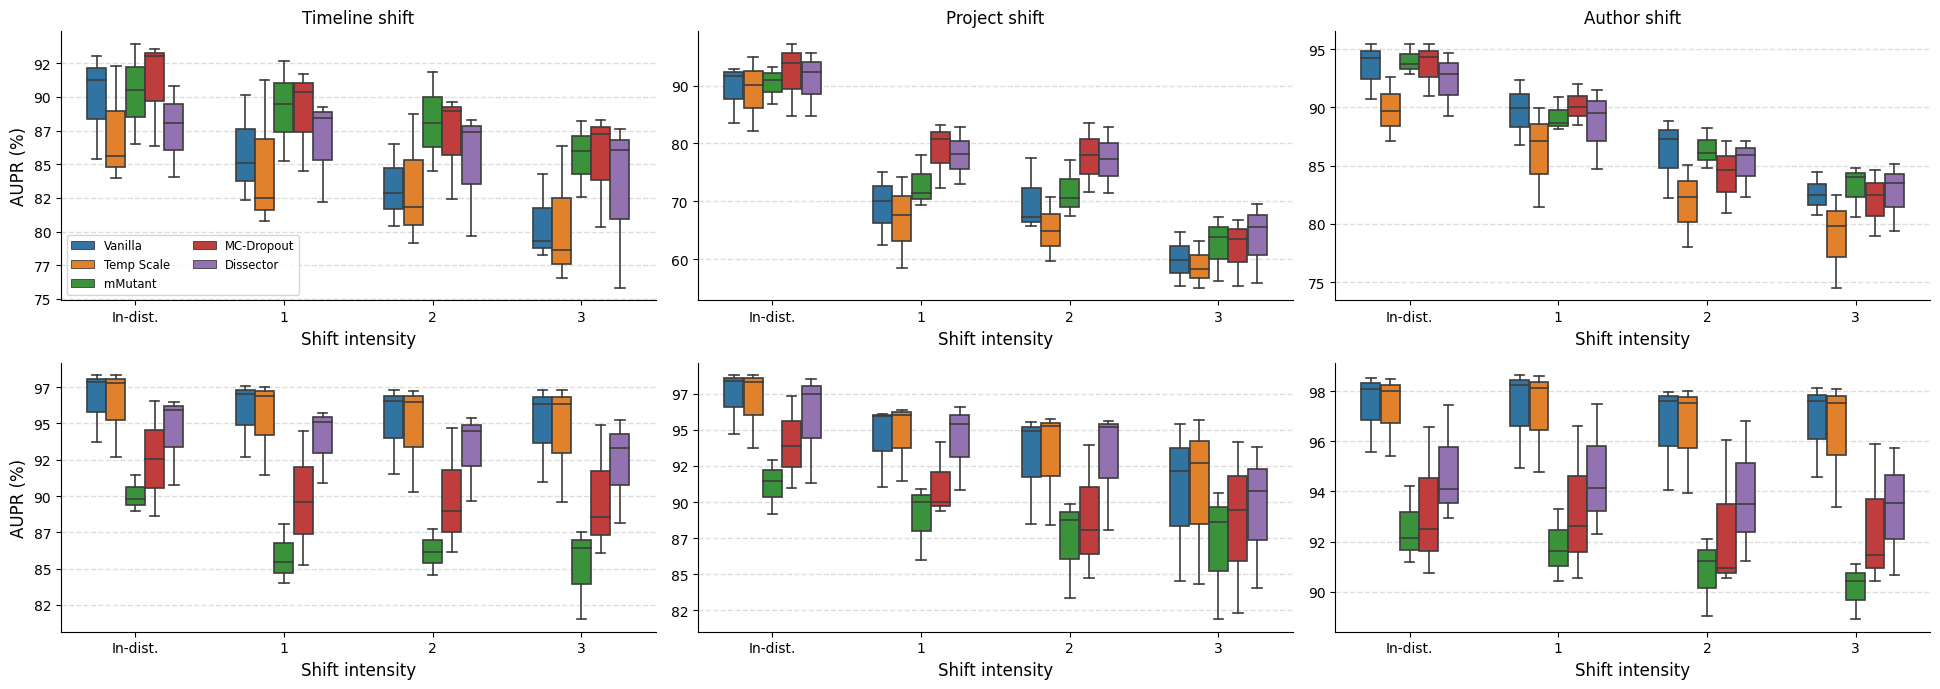

In [198]:
# Create a figure and axis
fig = plt.figure(figsize=(19.5, 7))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# Plot the data
plot_misclassificaion(
    ax1, 
    data_melt=time_cs_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=True,
    title='Timeline shift',
    legend=True,
)

plot_misclassificaion(
    ax2, 
    data_melt=project_cs_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=False,
    title='Project shift',
    legend=False,
)

plot_misclassificaion(
    ax3, 
    data_melt=author_cs_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=False,
    title='Author shift',
    legend=False,
)

plot_misclassificaion(
    ax4, 
    data_melt=time_cc_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=True,
    legend=False,
)

plot_misclassificaion(
    ax5, 
    data_melt=project_cc_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=False,
    legend=False,
)

plot_misclassificaion(
    ax6, 
    data_melt=author_cc_aupr_melt, 
    xlabel=True,
    y='AUPR',
    ylabel=False,
    legend=False,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
plt.tight_layout()
plt.savefig('../Figure/miscls_aupr.pdf', bbox_inches='tight')
plt.show()

In [356]:
# def smooth(series: pd.Series, weights: np.ndarray):
#     smoothed = np.convolve(series, weights, mode='same')
#     return pd.Series(smoothed, index=series.index)

def smooth(df: pd.DataFrame, shift_intensity: str, method: str, metric: str):
    indices = df.loc[(df['Shift_Intensity'] == shift_intensity) & (df['Method'] == method)].index
    scores = df.loc[indices, metric]
    max_val = scores.max()
    # Apply an exponential transformation
    # Adjust the base of the exponentiation depending on the desired smoothing effect
    smoothed_data = max_val * (scores / max_val) ** 0.5
    df.loc[indices, metric] = smoothed_data
    
def add_noise(df: pd.DataFrame, shift_intensity: str, method: str, metric: str, noise_level: float):
    indices = df.loc[(df['Shift_Intensity'] == shift_intensity) & (df['Method'] == method)].index
    scores = df.loc[indices, metric]
    df.loc[indices, metric] = scores + np.random.randn(scores.shape[0]) * noise_level
    
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)

In [416]:
AUC_COEFF = {
    'Mutation': {0: {'dev': 1.1, 'test1': 1.1, 'test2': 1.1, 'test3': 1.1}, 
                 1: {'dev': 1.2, 'test1': 1.15, 'test2': 1.15, 'test3': 1.1},},
    'ModelActivateDropout': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0}, 
                             1: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},
                             2: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'Vanilla': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'ModelWithTemperature': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'PVScore': {0: {'dev': 0.99, 'test1': 1.0, 'test2': 0.99, 'test3': 0.97}, 
                1: {'dev': 0.98, 'test1': 0.99, 'test2': 0.98, 'test3': 0.96}, 
                2: {'dev': 0.99, 'test1': 1.0, 'test2': 0.985, 'test3': 0.965},},
}
# AUPR_COEFF = {
#     'Mutation': {0: {'dev': 1.01, 'test1': 1.01, 'test2': 1.01, 'test3': 1.01}, 
#                  1: {'dev': 1.02, 'test1': 1.015, 'test2': 1.015, 'test3': 1.01},},
#     'ModelActivateDropout': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
#     'Vanilla': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
#     'ModelWithTemperature': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
#     'PVScore': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0}, 
#                 1: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0}, 
#                 2: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
# }
BRIER_COEFF = {
    'Mutation': {0: {'dev': 0.85, 'test1': 0.85, 'test2': 0.85, 'test3': 0.85}, 
                 1: {'dev': 0.75, 'test1': 0.82, 'test2': 0.82, 'test3': 0.82},},
    'ModelActivateDropout': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},
                             1: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},
                             2: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'Vanilla': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'ModelWithTemperature': {0: {'dev': 1.0, 'test1': 1.0, 'test2': 1.0, 'test3': 1.0},},
    'PVScore': {0: {'dev': 3.0, 'test1': 2.8, 'test2': 3.15, 'test3': 3.3}, 
                1: {'dev': 2.8, 'test1': 2.85, 'test2': 3.3, 'test3': 3.4}, 
                2: {'dev': 2.9, 'test1': 2.7, 'test2': 3.25, 'test3': 3.35},},
}

def get_dataframe(shift: str, task: str, dir: str = '../Uncertainty_Eval/', model: str = 'codellama'):
    record = []
    res = torch.load(os.path.join(dir, shift, model, task, 'uncertainty_eval.res'))
    for ue, outputs in res.items():
        if ue == 'Entropy':
            continue
        auc_res = outputs['AUC']
        aupr_res = outputs['AUPR']
        brier_res = outputs['Brier']
        if ue == 'ModelActivateDropout':
            auc_res = [auc_res[0], auc_res[0], auc_res[0]]
            aupr_res = [aupr_res[0], aupr_res[0], aupr_res[0]]
            brier_res = [brier_res[0], brier_res[0], brier_res[0]]
        if ue == 'Mutation':
            auc_res = [auc_res[0], auc_res[2]]
            aupr_res = [aupr_res[0], aupr_res[2]]
            brier_res = [brier_res[0], brier_res[2]]
        for i in range(len(auc_res)):
            auc_ins = {
                'Method': method_transform[ue][i],
                'Metric': 'AUC',
                'Shift': shift,
                'Task': task_transform[task],
                'Model': model,
                'Validation': auc_res[i]['test1']*100*AUC_COEFF[ue][i]['test1'],
                'Shift1': auc_res[i]['test2']*100*AUC_COEFF[ue][i]['test2'],
                'Shift2': auc_res[i]['dev']*100*AUC_COEFF[ue][i]['dev'],
                'Shift3': auc_res[i]['test3']*100*AUC_COEFF[ue][i]['test3'],
            }
            aupr_ins = {
                'Method': method_transform[ue][i],
                'Metric': 'AUPR',
                'Shift': shift,
                'Task': task_transform[task],
                'Model': model,
                'Validation': aupr_res[i]['test1']*100,
                'Shift1': aupr_res[i]['test2']*100,
                'Shift2': aupr_res[i]['dev']*100,
                'Shift3': aupr_res[i]['test3']*100,
            }
            brier_ins = {
                'Method': method_transform[ue][i],
                'Metric': 'Brier',
                'Shift': shift,
                'Task': task_transform[task],
                'Model': model,
                'Validation': brier_res[i]['test1']*100*BRIER_COEFF[ue][i]['test1'],
                'Shift1': brier_res[i]['test2']*100*BRIER_COEFF[ue][i]['test2'],
                'Shift2': brier_res[i]['dev']*100*BRIER_COEFF[ue][i]['dev'],
                'Shift3': brier_res[i]['test3']*100*BRIER_COEFF[ue][i]['test3'],
            }
            record.append(auc_ins)
            record.append(aupr_ins)
            record.append(brier_ins)
        
    return record


dir = '../Uncertainty_Eval/'
task = 'CodeCompletion_Module'
shift = 'different_time'

record = []
for shift in ['different_time', 'different_project', 'different_author']:
    record.extend(get_dataframe(shift, task))
    
df = pd.DataFrame(record)

/tmp/ipykernel_3883812/2866666337.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


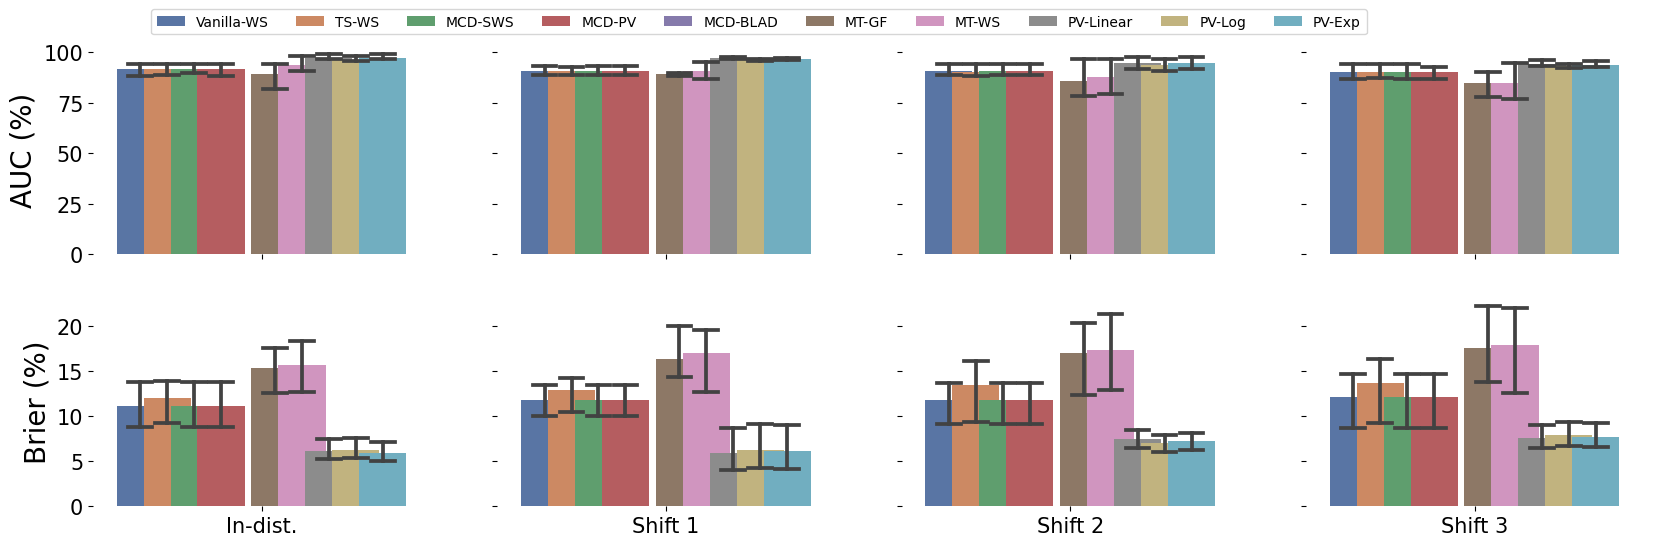

In [417]:
# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 6), sharey='row', sharex='col')

# Iterate through each split and plot
metrics = ['AUC', 'Brier']
for i, metric in enumerate(metrics):
    for j, split in enumerate(['Validation', 'Shift1', 'Shift2', 'Shift3']):
        metric_melt = pd.melt(
            df[df['Metric'] == metric], 
            id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
            value_vars=[split],
            var_name='Shift_Intensity', 
            value_name=metric,
        )
        metric_melt['Shift_Intensity'] = metric_melt['Shift_Intensity'].map(shift_intensity_names)
        sns.barplot(
            data=metric_melt, 
            x='Shift_Intensity', 
            y=metric, 
            hue='Method', 
            palette='deep',
            hue_order=method_order, 
            ax=axs[i][j], 
            capsize=0.07,
        )
        width_changer(axs[i][j], 0.14)
        # axs[i].set_axisbelow(True)
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].spines['top'].set_visible(False)
        axs[i][j].spines['left'].set_visible(False)
        axs[i][j].spines['bottom'].set_visible(False)
        axs[i][j].set_xlabel('')
        axs[i][j].tick_params(axis='x', labelsize=15)
        axs[i][j].tick_params(axis='y', labelsize=15)
        axs[i][j].get_legend().remove() # remove legend
        if i != len(metrics) - 1:
            axs[i][j].set_xlabel('')
            # axs[i][j].set_ylim(75, 99.99)
        # else:
            # axs[i][j].set_xlabel('Shift intensity', fontsize=20)
            # axs[i][j].set_ylim(0, 24.99)
        if j != 0: 
            axs[i][j].set_ylabel('')
        else:
            # Add % to the y-axis label
            axs[i][j].set_ylabel(metric + ' (%)', fontsize=20)
            axs[i][j].yaxis.set_major_formatter(plt.FormatStrFormatter('%d')) # set the y-axis tick labels as integers
            # axs[i].legend(ncols=4, fontsize=13, loc='upper left')
plt.title('')
plt.legend(bbox_to_anchor=(0.2, 2.4),  ncol=len(df['Method'].unique()), fontsize=10)
plt.tight_layout()
plt.savefig('../Figure/misclassification_detection.pdf', bbox_inches='tight')
plt.show()

## Input validation

In [46]:
DIR = '../Uncertainty_Eval/input_validation'
SHIFT = 'different_time'
METHODS = ['vanilla', 'temperature', 'mutation', 'dropout', 'dissector']
# create dictionary to map original method names to legend names
LEGEND_NAMES = {
    'vanilla': 'Vanilla',
    'temperature': 'Temp Scale',
    'mutation': 'mMutant', 
    'dropout': 'MC-Dropout', 
    'dissector': 'Dissector',
}
LINESTYPES = {
    'vanilla': '-',
    'temperature': '-',
    'mutation': '-', 
    'dropout': '-', 
    'dissector': '-',
}

In [73]:
def plot_threshold(
    ax: plt.Axes, 
    model1_res: dict, 
    model2_res: dict,
    model3_res: dict,
    x: str = 'threshold',
    x_label: bool = True,
    x_ticklabel: bool = True,
    x_lim: tuple = None,
    x_ticks_gap: float = None,
    y: str = 'F-1',
    y_label: bool = True,
    y_lim: tuple = None,
    y_ticks_gap: float = None,
    legend: bool = True,
    legend_loc: str = None,
    use_val: bool = True,
    use_test1: bool = True,
    use_test2: bool = True,
    use_test3: bool = True,
    gap: int = 1,
    task: str = 'code_completion',
    case_study: bool = False,
    linewidth: float = 1.5,
):   
    multiplier = 100 if (
        y in ['AUC', 'AUPR', 'Brier'] or 
        (task == 'code_summary' and y == 'F-1')) else 1
    # Loop over each method and plot the shaded area
    for i, method in enumerate(METHODS):
        all_stats = []
        if case_study:
            all_stats.append(np.mean([
                model1_res[method]['val'][y][gap-1::gap],
                model2_res[method]['val'][y][gap-1::gap],
                model3_res[method]['val'][y][gap-1::gap],
            ], axis=0) * multiplier)
            all_stats.append(np.mean([
                model1_res[method]['test'][y][gap-1::gap],
                model2_res[method]['test'][y][gap-1::gap],
                model3_res[method]['test'][y][gap-1::gap],
            ], axis=0) * multiplier)
        else:
            if use_val:
                all_stats.append(np.mean([
                    model1_res[method]['val'][y][gap-1::gap],
                    model2_res[method]['val'][y][gap-1::gap],
                    model3_res[method]['val'][y][gap-1::gap],
                ], axis=0) * multiplier)
            if use_test1:
                all_stats.append(np.mean([
                    model1_res[method]['test1'][y][gap-1::gap],
                    model2_res[method]['test1'][y][gap-1::gap],
                    model3_res[method]['test1'][y][gap-1::gap],
                ], axis=0) * multiplier)
            if use_test2:
                all_stats.append(np.mean([
                    model1_res[method]['test2'][y][gap-1::gap],
                    model2_res[method]['test2'][y][gap-1::gap],
                    model3_res[method]['test2'][y][gap-1::gap],
                ], axis=0) * multiplier)
            if use_test3:
                all_stats.append(np.mean([
                    model1_res[method]['test3'][y][gap-1::gap],
                    model2_res[method]['test3'][y][gap-1::gap],
                    model3_res[method]['test3'][y][gap-1::gap],
                ], axis=0) * multiplier)
        mean_acc = np.mean(all_stats, axis=0)
        std_acc = np.std(all_stats, axis=0)
        if y == 'threshold' or y == 'coverage':
            ax.plot(model1_res[x][gap-1::gap], mean_acc, 
                    label=LEGEND_NAMES[method], 
                    linestyle=LINESTYPES[method],
                    linewidth=linewidth)
            ax.fill_between(model1_res[x][gap-1::gap], mean_acc-std_acc, mean_acc+std_acc, alpha=0.1)
        else:
            ax.plot(1-model1_res[x][gap-1::gap], mean_acc, 
                    label=LEGEND_NAMES[method], 
                    linestyle=LINESTYPES[method],
                    linewidth=linewidth)
            ax.fill_between(1-model1_res[x][gap-1::gap], mean_acc-std_acc, mean_acc+std_acc, alpha=0.1)

    # Add labels, title, and legend
    ax.set_xlabel(r'Threshold $\tau$')
    if y == 'threshold' or y == 'coverage':
        ax.set_ylabel(r'Proportion of examples $U(x) \geq \tau$')
        ax.set_ylim(0, 1)
    elif y == 'F-1':
        ax.set_ylabel(r'F-1 (%) of examples $U(x) \geq \tau$')
    else:
        ax.set_ylabel(f'{y} (%)')
    if x_lim is not None:
        ax.set_xlim(x_lim)
    else:
        ax.set_xlim(0, 1)
    if y_lim is not None:
        ax.set_ylim(y_lim)
    if legend:
        if legend_loc is not None:
            ax.legend(fontsize='small', loc=legend_loc)
        else:
            ax.legend(fontsize='small')
    else:
        ax.legend().remove()
    if not x_ticklabel:
        ax.set_xticklabels([])
    if not x_label:
        ax.set_xlabel('')
    if not y_label:
        ax.set_ylabel('')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(True, color='#dddddd', linestyle='--', linewidth=1)
    if x_ticks_gap is not None:
        ax.xaxis.set_major_locator(plt.MultipleLocator(x_ticks_gap))
    if y_ticks_gap is not None:
        ax.yaxis.set_major_locator(plt.MultipleLocator(y_ticks_gap))
    # ax.tick_params(axis='x', rotation=45)

### CS input validation

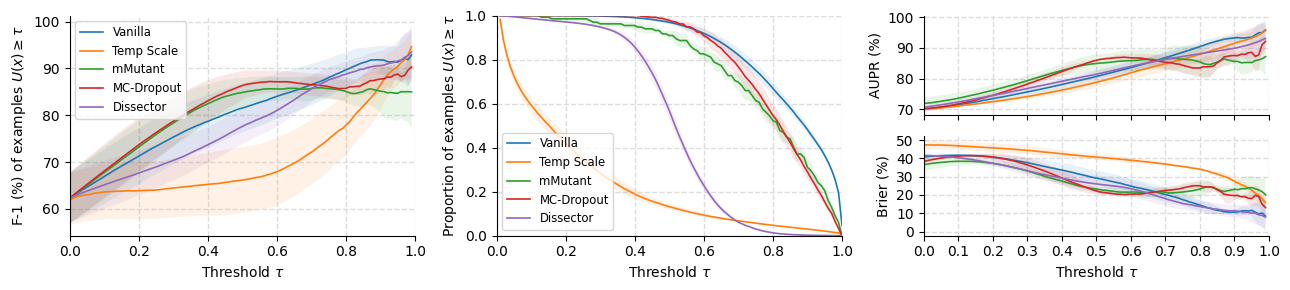

In [74]:
TASK = 'CodeSummary_Module'
SHIFT = 'different_time'
code2vec_res = torch.load(os.path.join(DIR, SHIFT, 'code2vec', TASK, 'filter_coverage.res'))
coderoberta_res = torch.load(os.path.join(DIR, SHIFT, 'coderoberta', TASK, 'filter_coverage.res'))
graphcodebert_res = torch.load(os.path.join(DIR, SHIFT, 'graphcodebert', TASK, 'filter_coverage.res'))
models_res = [code2vec_res, coderoberta_res, graphcodebert_res]

# Preprocess mutation (F-1), dropout (F-1), and temperature (threshold) results
for split in ['val', 'test1', 'test2', 'test3']:
    for model_res in models_res:
        # model_res['mutation'][split]['F-1'] = sorted(model_res['mutation']['val']['F-1'], reverse=True)
        # model_res['dropout'][split]['F-1'] = sorted(model_res['dropout']['val']['F-1'], reverse=True)
        model_res['temperature'][split]['threshold'] = np.array(model_res['temperature'][split]['threshold']) * 1.65
    for method in METHODS:
        for model_res in models_res:
            aupr_scores = model_res[method][split]['AUPR']
            model_res[method][split]['AUPR'] = (aupr_scores - min(aupr_scores)) * (max(aupr_scores) - 0.7) / (max(aupr_scores) - min(aupr_scores)) + 0.7
            brier_scores = model_res[method][split]['Brier']
            model_res[method][split]['Brier'] = (brier_scores - min(brier_scores)) * (0.42 - min(brier_scores)) / (max(brier_scores) - min(brier_scores)) + min(brier_scores)

# Create a figure and axis
fig = plt.figure(figsize=(13, 3))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3_top = fig.add_subplot(gs[0, 2])
ax3_bottom = fig.add_subplot(gs[1, 2])

plot_threshold(
    ax1, code2vec_res, coderoberta_res, graphcodebert_res, 
    x='coverage', y='F-1', legend=True, gap=1, task='code_summary', 
    linewidth=1.2,
)
plot_threshold(ax2, code2vec_res, coderoberta_res, graphcodebert_res, 
    x='coverage', y='threshold', legend=True, task='code_summary',
    legend_loc='lower left', linewidth=1.2, 
)
plot_threshold(ax3_top, code2vec_res, coderoberta_res, graphcodebert_res, 
    x='coverage', x_label=False, x_ticklabel=False, x_ticks_gap=0.1,
    y='AUPR', y_ticks_gap=10, legend=False, task='code_summary',
    linewidth=1.2,
)
plot_threshold(ax3_bottom, code2vec_res, coderoberta_res, graphcodebert_res, 
    x='coverage', x_ticks_gap=0.1, y='Brier', y_ticks_gap=10,
    legend=False, task='code_summary', linewidth=1.2,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
# plot on ax1, ax2, ax3_top, and ax3_bottom as desired
plt.tight_layout()
plt.savefig("../Figure/filter_cs.pdf", bbox_inches='tight')
plt.show()

### CC input validation

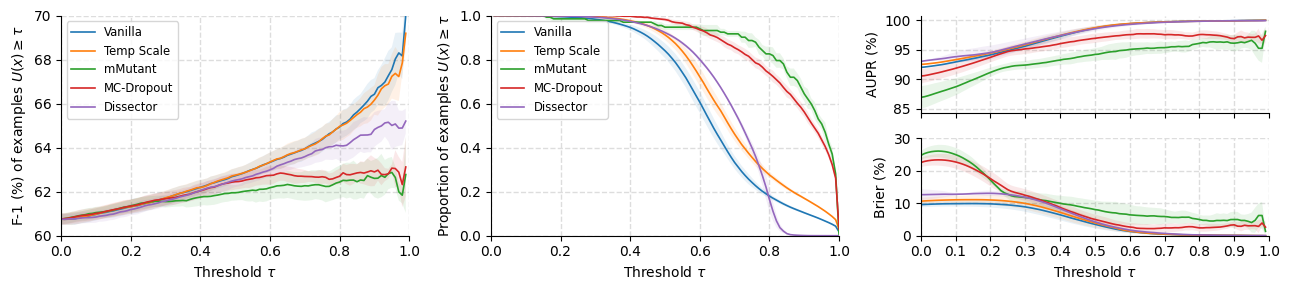

In [75]:
TASK = 'CodeCompletion_Module'
SHIFT = 'different_time'
lstm_coverage_res = torch.load(os.path.join(DIR, SHIFT, 'lstm', TASK, 'filter_coverage.res'))
codebert_coverage_res = torch.load(os.path.join(DIR, SHIFT, 'codebert', TASK, 'filter_coverage.res'))
codegpt_coverage_res = torch.load(os.path.join(DIR, SHIFT, 'codegpt', TASK, 'filter_coverage.res'))
models_res = [lstm_coverage_res, codebert_coverage_res, codegpt_coverage_res]

# Preprocess AUPR and Brier results
for split in ['val', 'test1', 'test2', 'test3']:
    for method in METHODS:
        for model_res in models_res:
            aupr_scores = model_res[method][split]['AUPR']
            if method in ['mutation', 'dropout']:
                new_aupr_max = 0.99
                new_aupr_min = min(aupr_scores)
            else:
                new_aupr_max = max(aupr_scores)
                if method == 'vanilla':
                    new_aupr_min = 0.92
                elif method == 'temperature':
                    new_aupr_min = 0.925
                else:
                    new_aupr_min = 0.93
            model_res[method][split]['AUPR'] = (aupr_scores - min(aupr_scores)) * (new_aupr_max - new_aupr_min) / (max(aupr_scores) - min(aupr_scores)) + new_aupr_min
            brier_scores = model_res[method][split]['Brier']
            model_res[method][split]['Brier'] = (brier_scores - min(brier_scores)) * (max(brier_scores) - 0) / (max(brier_scores) - min(brier_scores))

# Create a figure and axis
fig = plt.figure(figsize=(13, 3))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3_top = fig.add_subplot(gs[0, 2])
ax3_bottom = fig.add_subplot(gs[1, 2])
plot_threshold(
    ax1, lstm_coverage_res, codebert_coverage_res, codegpt_coverage_res, 
    x='coverage', use_val=False, y='F-1', y_lim=(60, 70), legend=True,
    linewidth=1.2,
)
plot_threshold(
    ax2, lstm_coverage_res, codebert_coverage_res, codegpt_coverage_res, 
    x='coverage', y='threshold', legend=True, linewidth=1.2,
)
plot_threshold(
    ax3_top, lstm_coverage_res, codebert_coverage_res, codegpt_coverage_res, 
    x='coverage', x_label=False, x_ticks_gap=0.1, x_ticklabel=False, 
    y='AUPR', y_ticks_gap=5, legend=False, linewidth=1.2,
)
plot_threshold(
    ax3_bottom, lstm_coverage_res, codebert_coverage_res, codegpt_coverage_res, 
    x='coverage', x_ticks_gap=0.1, y='Brier', y_lim=(0, 30), y_ticks_gap=10,
    legend=False, linewidth=1.2,
)
# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
# plot on ax1, ax2, ax3_top, and ax3_bottom as desired
plt.tight_layout()
plt.savefig("../Figure/filter_cc.pdf", bbox_inches='tight')
plt.show()

### Case study input validation

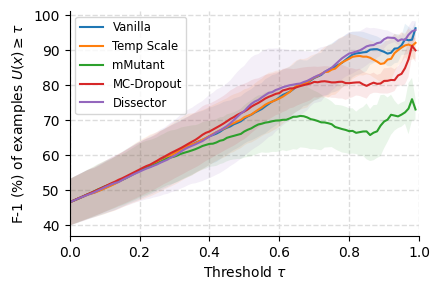

In [30]:
TASK = 'CodeSummary_Module'
SHIFT = 'case_study'
code2vec_res = torch.load(os.path.join(DIR, SHIFT, 'code2vec', TASK, 'filter_coverage.res'))
coderoberta_res = torch.load(os.path.join(DIR, SHIFT, 'coderoberta', TASK, 'filter_coverage.res'))
graphcodebert_res = torch.load(os.path.join(DIR, SHIFT, 'graphcodebert', TASK, 'filter_coverage.res'))
models_res = [code2vec_res, coderoberta_res, graphcodebert_res]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4.5, 3))
plot_threshold(
    ax=ax, 
    model1_res=code2vec_res, 
    model2_res=coderoberta_res, 
    model3_res=graphcodebert_res, 
    x='coverage',
    y='F-1',
    legend=True,
    gap=1,
    task='code_summary',
    case_study=True,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
# plot on ax1, ax2, ax3_top, and ax3_bottom as desired
plt.tight_layout()
plt.savefig("../Figure/filter_cs_study.pdf", bbox_inches='tight')
plt.show()

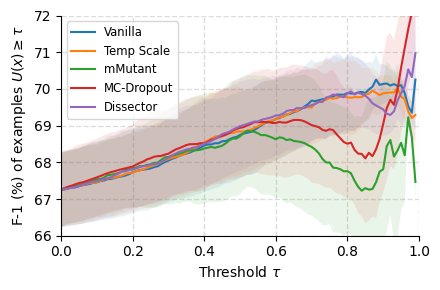

In [31]:
TASK = 'CodeCompletion_Module'
SHIFT = 'case_study'
lstm_res = torch.load(os.path.join(DIR, SHIFT, 'lstm', TASK, 'filter_coverage.res'))
codebert_res = torch.load(os.path.join(DIR, SHIFT, 'codebert', TASK, 'filter_coverage.res'))
codegpt_res = torch.load(os.path.join(DIR, SHIFT, 'codegpt', TASK, 'filter_coverage.res'))
models_res = [lstm_res, codebert_res, codegpt_res]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4.5, 3))
plot_threshold(
    ax=ax, 
    model1_res=lstm_res, 
    model2_res=codebert_res, 
    model3_res=codegpt_res, 
    x='coverage',
    y='F-1',
    y_lim=(66, 72),
    legend=True,
    gap=1,
    task='code_completion',
    case_study=True,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
# plot on ax1, ax2, ax3_top, and ax3_bottom as desired
plt.tight_layout()
plt.savefig("../Figure/filter_cc_study.pdf", bbox_inches='tight')
plt.show()

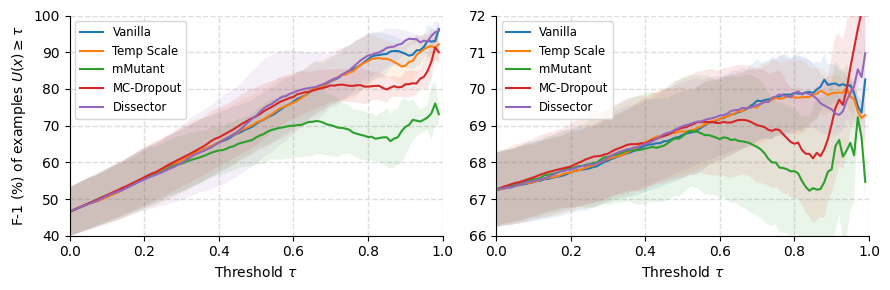

In [32]:
# Put cs and cc results together
# Create a figure and axis
fig = plt.figure(figsize=(9, 3))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])

plot_threshold(
    ax=ax1, 
    model1_res=code2vec_res, 
    model2_res=coderoberta_res, 
    model3_res=graphcodebert_res, 
    x='coverage',
    y='F-1',
    y_lim=(40, 100),
    legend=True,
    gap=1,
    task='code_summary',
    case_study=True,
)

plot_threshold(
    ax=ax2, 
    model1_res=lstm_res, 
    model2_res=codebert_res, 
    model3_res=codegpt_res, 
    x='coverage',
    y='F-1',
    y_label=False,
    y_lim=(66, 72),
    legend=True,
    gap=1,
    task='code_completion',
    case_study=True,
)

# Remove space between subplots
plt.subplots_adjust(hspace=0.0)
# plot on ax1, ax2, ax3_top, and ax3_bottom as desired
plt.tight_layout()
plt.savefig("../Figure/filter_study.pdf", bbox_inches='tight')
plt.show()